In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', 500)

df = pd.read_csv('data/data.csv')
df.head(100)


,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN
5,103378.0,for_sale,179000.0,4.0,3.0,0.46,1850806.0,San Sebastian,Puerto Rico,612.0,2520.0,NaN
6,1205.0,for_sale,50000.0,3.0,1.0,0.20,1298094.0,Ciales,Puerto Rico,639.0,2040.0,NaN
7,50739.0,for_sale,71600.0,3.0,2.0,0.08,1048466.0,Ponce,Puerto Rico,731.0,1050.0,NaN
8,81909.0,for_sale,100000.0,2.0,1.0,0.09,734904.0,Ponce,Puerto Rico,730.0,1092.0,NaN
9,65672.0,for_sale,300000.0,5.0,3.0,7.46,1946226.0,Las Marias,Puerto Rico,670.0,5403.0,NaN


In [40]:
missing_data = df.isnull().mean() * 100
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
print(missing_data)

prev_sold_date    32.981627
house_size        25.533983
bath              22.986666
bed               21.618797
acre_lot          14.624130
street             0.488056
brokered_by        0.203604
price              0.069215
city               0.063197
zip_code           0.013430
state              0.000359
dtype: float64


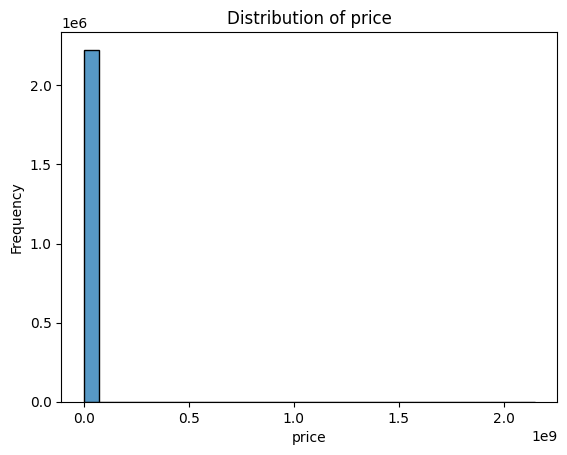

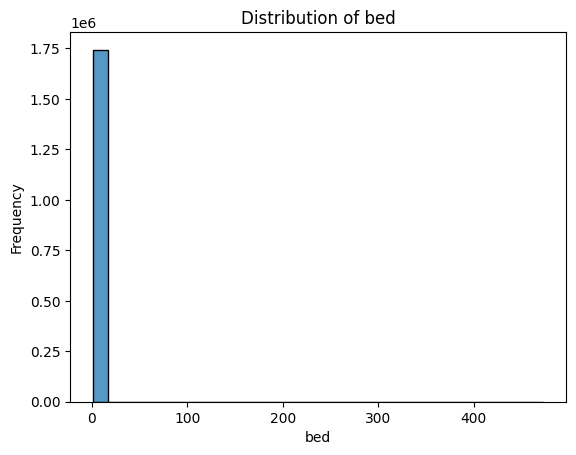

In [ ]:
for col in df[['price', 'bed', 'bath', 'acre_lot', 'house_size']]:
    plt.figure()
    sns.histplot(df[col], bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
# Drop rows that exceed interquartile range
for col in df.select_dtypes(include='number').columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

df.describe()


,brokered_by,price,bed,bath,acre_lot,street,zip_code,house_size
count,970773.000000,9.723710e+05,972371.000000,972371.000000,972371.000000,9.696230e+05,972324.000000,972371.000000
mean,53915.575437,3.781817e+05,3.208877,2.280873,0.219206,9.293883e+05,55437.072540,1783.793186
std,30223.307950,2.173390e+05,0.764711,0.792443,0.151848,5.324721e+05,28783.596206,621.394163
min,0.000000,1.000000e+00,2.000000,1.000000,0.000000,6.300000e+01,601.000000,100.000000
25%,25983.000000,2.200000e+05,3.000000,2.000000,0.130000,4.648835e+05,30906.000000,1309.000000
50%,53016.000000,3.390000e+05,3.000000,2.000000,0.180000,9.345320e+05,55426.000000,1685.000000
75%,79221.000000,4.950000e+05,4.000000,3.000000,0.270000,1.389726e+06,80226.000000,2171.000000
max,110142.000000,1.127000e+06,5.000000,4.000000,0.830000,2.001321e+06,99929.000000,3572.000000


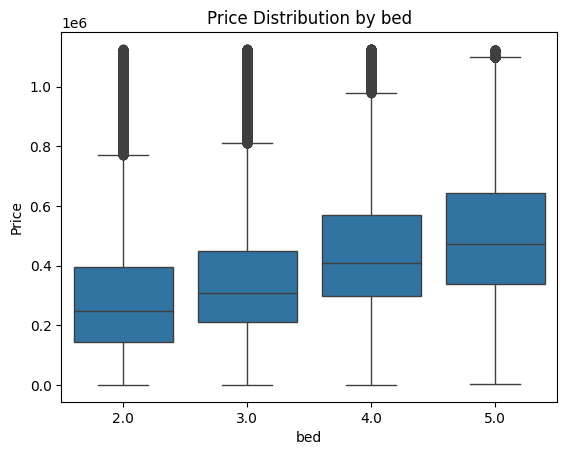

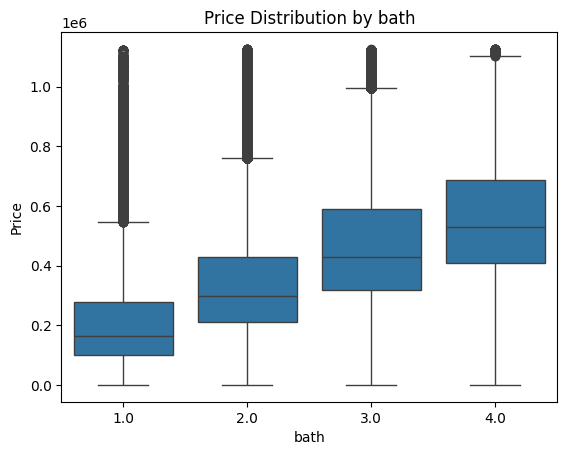

In [ ]:
for col in df.select_dtypes(include='number').columns:
    if df[col].nunique() < 20:
        plt.figure()
        sns.boxplot(x=col, y='price', data=df)
        plt.title(f'Price Distribution by {col}')
        plt.xlabel(col)
        plt.ylabel('Price')
        plt.show()

In [ ]:
df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
5,103378.0,for_sale,179000.0,4.0,3.0,0.46,1850806.0,San Sebastian,Puerto Rico,612.0,2520.0,NaN
